<a href="https://colab.research.google.com/github/Sindhushreen/Mini-Project/blob/main/image_classification_using_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from matplotlib import image
import numpy as np
import os
import pandas as pd
import skimage

from skimage import io
from skimage.io import imread
from skimage.transform import resize
from PIL import Image


In [2]:
# gathering data

!mkdir images

!pip install bing-image-downloader

In [3]:
from bing_image_downloader import downloader
downloader.download("beautiful flowers", limit=10,  output_dir='images', adult_filter_off=True, force_replace=False, timeout=60)
downloader.download("fruits", limit=10,  output_dir='images', adult_filter_off=True, force_replace=False, timeout=60)
downloader.download("cute animals", limit=10,  output_dir='images', adult_filter_off=True, force_replace=False, timeout=60)



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://weneedfun.com/wp-content/uploads/2016/01/Abstact-Watercolor-Paintings-Of-Flowers-3-698x1024.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.deerpearlflowers.com/wp-content/uploads/2015/06/white-wedding-cake-white-sugar-dogwood-flowers-683x1024.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://www.templatesperfect.com/wp-content/uploads/2013/11/14-realisitic-painting.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.hdwallpapers.in/download/cherry_blossom_trees-1366x768.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.hdwallpapers.in/download/butterfly_on_flower-1920x1080.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://cdn.sortra.com/wp-content/uploads/2014/08/fresh-flower03.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://www.hdwallpapers.in/download/best_of_nature_widescreen-1680x1050.

In [4]:
pip install flickrapi

     |████████████████████████████████| 61kB 4.4MB/s 


In [5]:
from flickrapi import FlickrAPI
from urllib.request import urlretrieve
from pprint import pprint
import os,time,sys


key = "34beee6f0690b71b22e664295e30067d"
secret = "093f9b173b04a6ef"
wait_time = 1

images = sys.argv[1]
savedir = "./"+images


flickr = FlickrAPI(key, secret, format='parsed-json')

"""
text :Search keyword
per_page :Number of data you want to acquire
media :Type of data to search
sort :Sequence of data
safe_seach :Whether to display UI content
extras :The value of the option you want to get(url_q Image address information)
"""
result  = flickr.photos.search(
    text = 'pretty plants',
    per_page = 10,
    media = 'photos',
    sort = 'relevance',
    safe_seach = 1,
    extras = 'url_q, licence'
)

#result
photos = result['photos']
pprint(photos)

{'page': 1,
 'pages': 55304,
 'perpage': 10,
 'photo': [{'farm': 6,
            'height_q': 150,
            'id': '9338651181',
            'isfamily': 0,
            'isfriend': 0,
            'ispublic': 1,
            'owner': '53409926@N07',
            'secret': '6159eba705',
            'server': '5547',
            'title': 'Pretty Little Plant',
            'url_q': 'https://live.staticflickr.com/5547/9338651181_6159eba705_q.jpg',
            'width_q': 150},
           {'farm': 6,
            'height_q': 150,
            'id': '31447206686',
            'isfamily': 0,
            'isfriend': 0,
            'ispublic': 1,
            'owner': '32218103@N08',
            'secret': '08512ab696',
            'server': '5605',
            'title': 'Prettiness',
            'url_q': 'https://live.staticflickr.com/5605/31447206686_08512ab696_q.jpg',
            'width_q': 150},
           {'farm': 8,
            'height_q': 150,
            'id': '9339265456',
            'isfamily'

In [18]:
for i,photo in enumerate(photos['photo']):
    url_q = photo['url_q']
    images = savedir + '/' + photo['id'] + '.jpg'

   #If there are duplicate files, skip them.
    if os.path.exists(images):continue
  
   #Wait 1 second to avoid overloading the server
    time.sleep(wait_time)
    

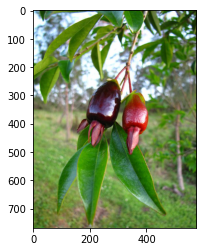

In [19]:
# preprossing data
from skimage import data
import os
from skimage import io 

result=[]
images=[]
flat_imgdata=[]
directory='/content/images'
data=['beautiful flowers','cute animals','fruits']


for category in data:
  class_num = data.index(category)
  path = os.path.join(directory,category)
  
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    # print(img_array)
    # print(img_array.shape)
    plt.imshow(img_array)

# resize and flattening of data
    resized_img = resize(img_array,(200,200,3))
    flat_imgdata.append(resized_img.flatten())
    images.append(resized_img)
    result.append(class_num)

    

In [20]:
result

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [21]:
images

[array([[[0.78039216, 0.59584314, 0.39192157],
         [0.77278431, 0.58552588, 0.38840824],
         [0.77979804, 0.5839549 , 0.39179804],
         ...,
         [0.70330196, 0.72356275, 0.52428235],
         [0.69511765, 0.71790549, 0.4575098 ],
         [0.71986392, 0.72913843, 0.49654784]],
 
        [[0.8095098 , 0.61343137, 0.41805882],
         [0.80958824, 0.62031373, 0.42763804],
         [0.80696078, 0.62352941, 0.43137255],
         ...,
         [0.59248824, 0.66233529, 0.39852745],
         [0.56371647, 0.62612824, 0.31939373],
         [0.64366667, 0.68463098, 0.39000353]],
 
        [[0.77507843, 0.59194118, 0.39615098],
         [0.77952745, 0.59913529, 0.40666667],
         [0.77411765, 0.59944118, 0.40728431],
         ...,
         [0.56714706, 0.65966667, 0.35296078],
         [0.62266863, 0.6869451 , 0.41735294],
         [0.67426863, 0.71298039, 0.47958235]],
 
        ...,
 
        [[0.04801961, 0.06392157, 0.04801961],
         [0.05129216, 0.06582549, 0.05288

In [22]:
flat_imgdata

[array([0.78039216, 0.59584314, 0.39192157, ..., 0.09315686, 0.10770471,
        0.09315686]),
 array([0.31470588, 0.25196078, 0.05980392, ..., 0.32397304, 0.24313725,
        0.06987255]),
 array([0.82352941, 0.72156863, 0.6       , ..., 0.75302941, 0.70115686,
        0.65696618]),
 array([0.31201961, 0.63921569, 0.84262745, ..., 0.38823529, 0.60784314,
        0.75294118]),
 array([0.36078431, 0.20219608, 0.16862745, ..., 0.01568627, 0.4       ,
        0.29137255]),
 array([0.        , 0.        , 0.        , ..., 0.70196078, 0.65882353,
        0.62745098]),
 array([0.14509804, 0.21568627, 0.36470588, ..., 0.20784314, 0.12892157,
        0.02352941]),
 array([0.57665706, 0.65805863, 0.64729412, ..., 0.47163725, 0.39320588,
        0.39712745]),
 array([0.02817922, 0.04745373, 0.07098314, ..., 0.27209529, 0.5254902 ,
        0.89562471]),
 array([0.09054902, 0.05133333, 0.0434902 , ..., 0.06666667, 0.02347647,
        0.01568627]),
 array([0.75546078, 0.65543137, 0.64232353, ..., 0

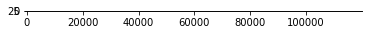

In [23]:
plt.imshow(flat_imgdata)

In [24]:
# algorithm with best parameter 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_imgdata,result,
                                                 test_size=0.1,random_state=200)

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['poly']}
]

svc = svm.SVC(probability=True)
clf= GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['poly']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [38]:
# evalating the model
y_pred = clf.predict(x_test)
print('y_pred=',y_pred)

print('y_test=',y_test)


y_pred= [2 2 0]
y_test= [2, 2, 0]


In [39]:
from sklearn.metrics import confusion_matrix,classification_report

In [40]:
confusion_matrix(y_pred,y_test)

array([[1, 0],
       [0, 2]])

In [41]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         1\n           2       1.00      1.00      1.00         2\n\n    accuracy                           1.00         3\n   macro avg       1.00      1.00      1.00         3\nweighted avg       1.00      1.00      1.00         3\n'

In [42]:
# predicting a new image
import pickle
pickle.dump(clf,open('clsfn_model.p','wb'))

In [43]:
model = pickle.load(open('clsfn_model.p','rb'))

Enter the URLhttps://i.pinimg.com/originals/a4/0c/c0/a40cc0f58f64009050739f9c87853a82.jpg
(874, 650, 3)
DESIRED OUTPUt:cute animals


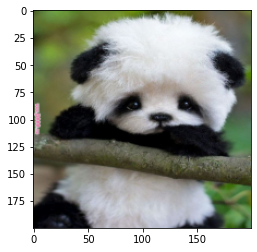

In [55]:
flat_data =[]
url = input('Enter the URL')
img = imread(url)
img_resized = resize(img,(200,200,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = data[y_out[0]]
print(f'DESIRED OUTPUt:{y_out}')